In [1]:
##Let's see how oxygen concentration looks like on our transict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

##Define path name for pre ctd files##
path1 = Path("/Users/mariacristinaalvarez/Documents/PcalO2cal/Pre")
csv_files1 = path1.glob("*Pre1dbar.cnv")

#import pre ctd files
pre_list = [pd.read_csv(file, encoding="ISO-8859-1", delim_whitespace=True, skiprows=327, header=None)
               .assign(filename=file.stem.split("_")[1]) for file in csv_files1]
#concat pre ctd files
pre_df = pd.concat(pre_list)

##Define path name for post ctd filesss
##Define path name for pre ctd files##
path2 = Path("/Users/mariacristinaalvarez/Documents/PcalO2cal//Northbound")
csv_files2 = path2.glob("*1dbar.cnv")
#import pre ctd files
post_list = [pd.read_csv(file2, encoding="ISO-8859-1", delim_whitespace=True, skiprows=319, header=None)
               .assign(filename=file2.stem.split("_")[1]) for file2 in csv_files2]

#concat pre ctd files
post_df = pd.concat(post_list)

#Correct both pre and post files with different CF, creating a new column
pre_df['CFO2'] = pre_df[16]*1.0098

post_df['CFO2'] = post_df[16]*1.01948

# Concatenate all DataFrames

all_df = pd.concat([pre_df, post_df])

In [23]:
import math 
#constants from Table 1 of Garcia & Gordon for the fit to Benson and Krause (1984)
A0_o2 = 5.80871
A1_o2 = 3.20291
A2_o2 = 4.17887
A3_o2 = 5.10006
A4_o2 = -9.86643e-2
A5_o2 = 3.80369
B0_o2 = -7.01577e-3
B1_o2 = -7.70028e-3
B2_o2 = -1.13864e-2
B3_o2 = -9.51519e-3
C0_o2 = -2.75915e-7
# convert T to scaled temperature
all_df['temp_S'] = np.log((298.15 - all_df[2])/(273.15 + all_df[2]))
all_df['exp_O2umolkg'] = np.exp(A0_o2 + A1_o2*all_df['temp_S'] + A2_o2*(all_df['temp_S']**2) +  A3_o2*(all_df['temp_S']**3 )+ A4_o2*(all_df['temp_S']**4) + A5_o2*(all_df['temp_S']**5) + all_df[24]*(B0_o2 + B1_o2*all_df['temp_S']+ B2_o2*(all_df['temp_S']**2) + B3_o2*(all_df['temp_S']**3))+ C0_o2*(all_df[24]**2) )
all_df['Sat_O2umolkg'] = all_df[15]/all_df['exp_O2umolkg'] 
all_df['AOU'] = all_df['exp_O2umolkg']- all_df['CFO2']

KeyError: 24

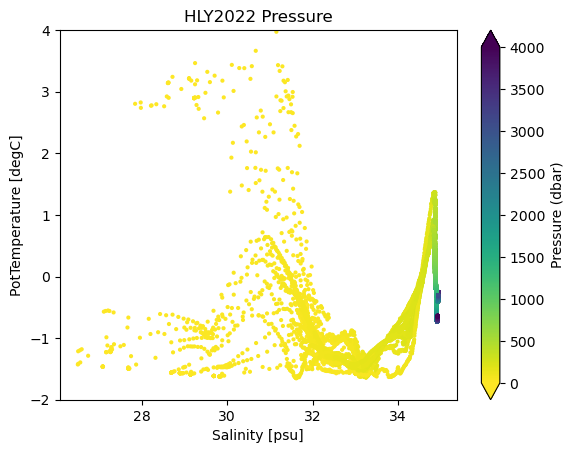

In [69]:
##Plotting all stations colored by latitude and longitude

import seaborn as sns
import colorcet as cc

#custom_palette = sns.color_palette("viridis", 29)
#palette = sns.color_palette("magma", n_colors=31)

plot = sns.scatterplot(x=4,
            y=2,
            data=all_df,
            hue=0,palette= "viridis_r",marker='.',linewidth=0, legend= False)
plot.set(ylim = (-2.0,4.0))
#plot.set(xlim = (27,35))
plot.set(xlabel ="Salinity [psu]", ylabel = "PotTemperature [degC]", title= 'HLY2022 Pressure')

#Adding colorbar
norm = plt.Normalize(0, 4000)
sm = plt.cm.ScalarMappable(cmap="viridis_r", norm=norm)
sm.set_array([])

plot.figure.colorbar(sm, ax= plot, extend='both', label='Pressure (dbar)')

#plot.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap,cax=0))

plt.show()

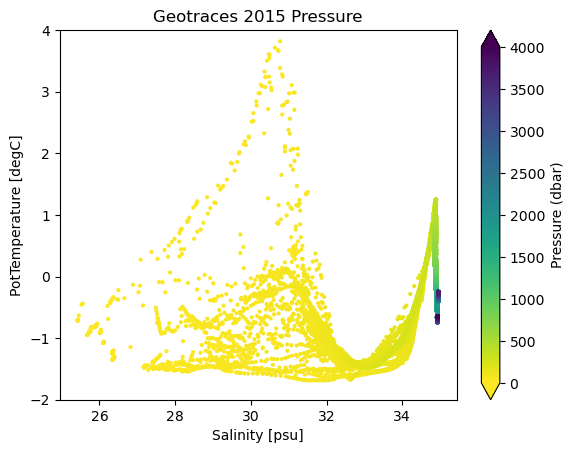

In [68]:
##Importing GEOTRACES files, quality control filtered previosuly
geoeast= pd.read_csv('/Users/mariacristinaalvarez/Documents/PcalO2cal/EastGeotraces2015_QC.csv')

fig = sns.scatterplot(x='salinity',
            y='temperature',
            data=geoeast,
            hue='pressure',palette= "viridis_r",marker='.',linewidth=0, legend= False)
fig.set(ylim = (-2.0,4.0))
#fig.set(xlim = (27,35))
fig.set(xlabel ="Salinity [psu]", ylabel = "PotTemperature [degC]", title= 'Geotraces 2015 Pressure')

#Adding colorbar
norm = plt.Normalize(0, 4000)
sm = plt.cm.ScalarMappable(cmap="viridis_r", norm=norm)
sm.set_array([])

fig.figure.colorbar(sm, ax= fig, extend='both', label='Pressure (dbar)')

In [67]:
geoeast['pressure'].min()

0.0

In [22]:
##Plotting all stations colored by latitude and longitude

import seaborn as sns
import colorcet as cc

#custom_palette = sns.color_palette("viridis", 29)
#palette = sns.color_palette("magma", n_colors=31)

plot = sns.scatterplot(x=24,
            y=23,
            data=all_df,
            hue='AOU',palette= "coolwarm",marker='.',linewidth=0, legend= False)
plot.set(ylim = (-2.0,4.0))
plot.set(xlim = (27,35))
norm = plt.Normalize(-100.0, 100)
sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=norm)
sm.set_array([])
plot.figure.colorbar(sm, label= 'AOU', extend='both')
plot.set(xlabel ="Salinity [psu]", ylabel = "PotTemperature [degC]", title= 'HLY2202 Northbound T/S AOU')
#plt.show()

ValueError: Could not interpret value `AOU` for `hue`. An entry with this name does not appear in `data`.

In [ ]:
#levels2 = np.linspace(20,30,num= 20)
#density = plt.contour(Xi, Yi, density , levels = levels2, linestyles = 'dashed', linewidths = 3, cmap = 'spring' )
#plt.clabel(density, inline=1, fontsize=10)

#plt.savefig("HLY2202_O2_NORTHERNCB.png",facecolor='white',transparent = False)

<a list of 10 text.Text objects>

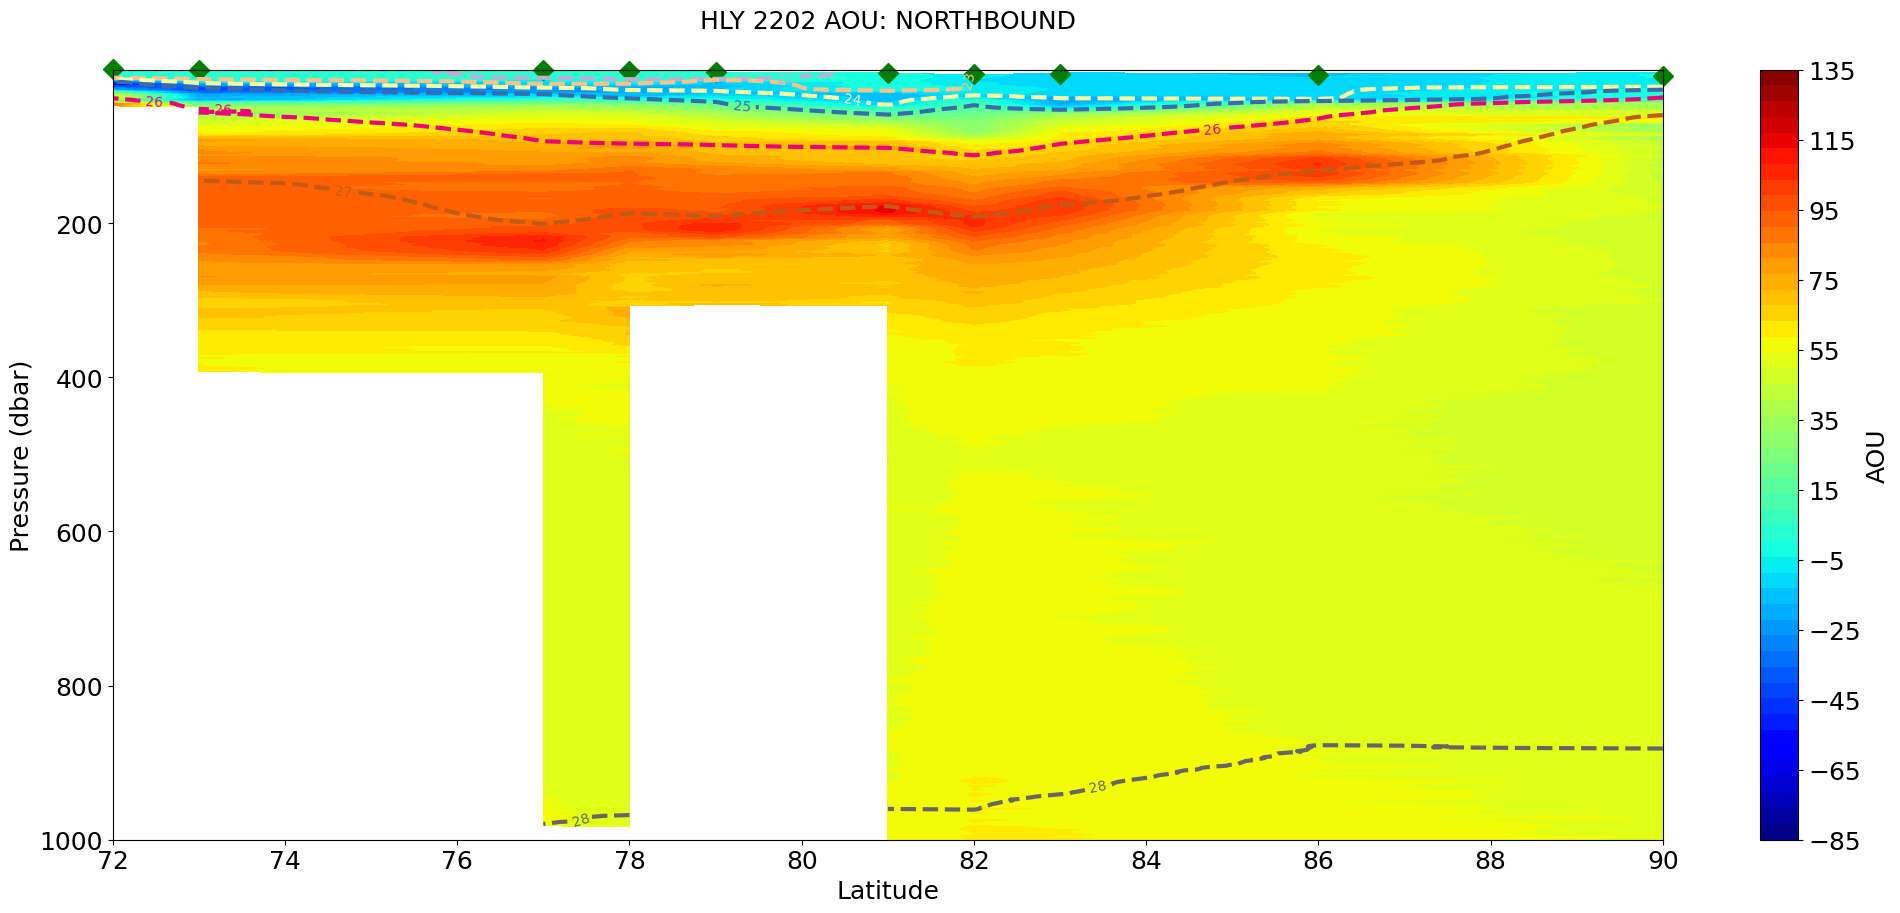

In [82]:
###AOU plots using exp. 

all_df[18] = all_df[18].round(decimals=0)
all_df = all_df.sort_index().interpolate(method='linear', limit_area='inside')
aou_df = all_df.pivot_table(index=0, columns = 18, values='AOU')

depth2 = aou_df.index
lati2 = aou_df.columns
oxygen2 = aou_df.values.transpose()
xi, yi = np.meshgrid(lati2,depth2,indexing='ij')
#from matplotlib.colors import LogNorm
plt.figure(figsize=(25,10))
levels = np.linspace(-85,135)
plt.contourf(xi,yi,oxygen2, cmap = 'jet',levels = levels, vmin=-85, vmax=135)
plt.gca().invert_yaxis()
cbar = plt.colorbar(ticks=(-85,-65,-45,-25,-5,15,35,55,75,95, 115,135))
cbar.set_label('AOU', fontsize=18)
cbar.ax.tick_params(labelsize=18)
plt.xlabel('Latitude',fontsize=18)
plt.ylabel('Pressure (dbar)' ,fontsize=18)
plt.ylim(bottom = 1000)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.plot(lati2,range(len(lati2)),'gD', clip_on=False, markersize=10)
#plt.xlim(left = 80)
plt.title("HLY 2202 AOU: NORTHBOUND", pad=30, fontsize=18)


##Creating matrix for density tables
density_df = all_df.pivot_table(index=0, columns = 18, values=22)
density_df.dropna()
density_df.drop(index=density_df.index[0], axis=0, inplace=True)
depth3 = density_df.index
lati3 = density_df.columns
density = density_df.values.transpose()
Xi,Yi = np.meshgrid(lati3,depth3, indexing='ij')


density = plt.contour(Xi, Yi, density , linestyles = 'dashed', linewidths = 3, cmap = 'Accent' )
plt.clabel(density, inline=1, fontsize=10)



In [86]:
all_df['CFO2'].min()

246.43584195999998

TypeError: Input z must be 2D, not 0D

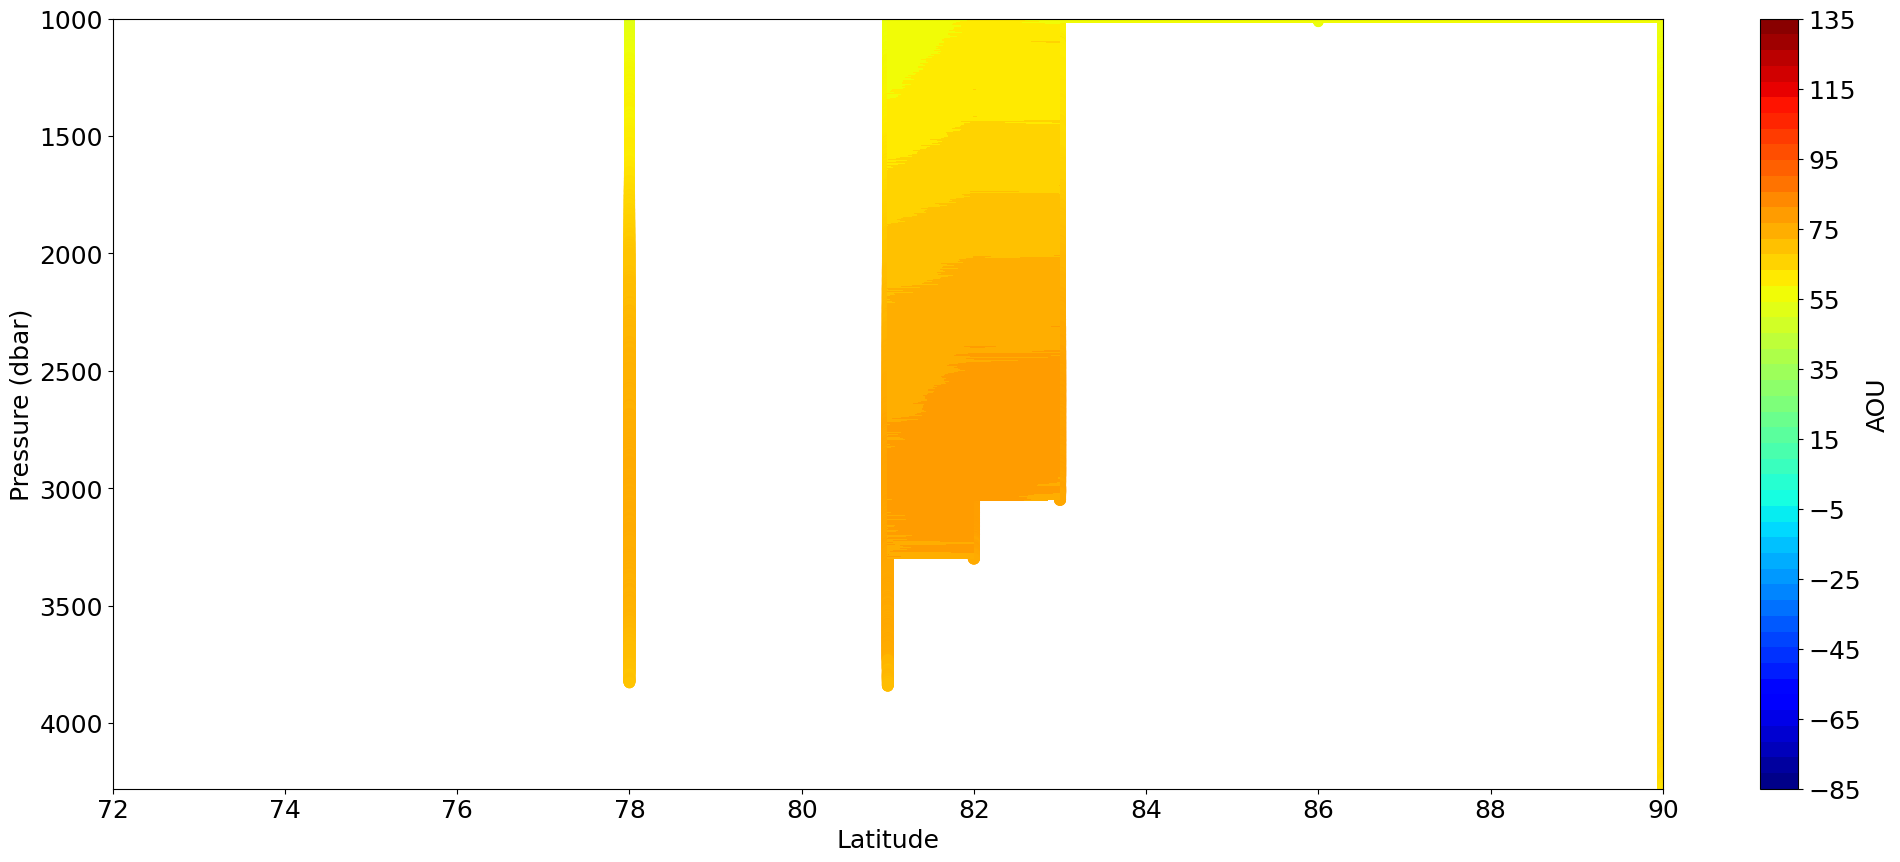

In [83]:
###AOU plots using exp. 
lower_1000 = all_df.loc[all_df[0] >= 1000]
lower1000df = lower_1000.pivot_table(index=0, columns = 18, values='AOU')

y2 = lower_1000[0]
x2 = lower_1000[18]
z2 = lower_1000['AOU']
#xi, yi = np.meshgrid(lati2,depth2,indexing='ij')
#from matplotlib.colors import LogNorm
plt.figure(figsize=(25,10))

plt.scatter(x2,y2,z2, cmap = 'jet',c=z2 ,linewidths=20, vmin=-85,vmax=135 , edgecolors='none')
levels = np.linspace(-85,135)
plt.contourf(xi,yi,oxygen2, cmap = 'jet',levels = levels, vmin=-85, vmax=135)
plt.gca().invert_yaxis()
plt.xticks([72,74,76,78,80,82,84,86,88,90])
cbar = plt.colorbar(ticks=(-85,-65,-45,-25,-5,15,35,55,75,95, 115,135))
cbar.set_label('AOU', fontsize=18)
cbar.ax.tick_params(labelsize=18)
plt.xlabel('Latitude',fontsize=18)
plt.ylabel('Pressure (dbar)' ,fontsize=18)
plt.ylim(top = 1000)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
density = plt.contour(Xi, Yi, density , linestyles = 'dashed', linewidths = 3, cmap = 'Accent' )
plt.clabel(density, inline=1, fontsize=10)
#plt.xlim(left = 80)


#plt.savefig("HLY2202_O2_SouthernBound(1000m).png",facecolor='white',transparent = False)

In [16]:
all_df['AOU'].min(), all_df['AOU'].max()

(-86.70711548385941, 114.11081045708536)

In [7]:
all_df[18] = all_df[18].round(decimals=0)
all_df = all_df.sort_index().interpolate(method='nearest')
pivot_df = all_df.pivot_table(index=0, columns = 18, values='CFO2')

In [13]:
##Creating matrix for density tables
density_df = all_df.pivot_table(index=0, columns = 18, values=22)
density_df.dropna()
density_df.drop(index=density_df.index[0], axis=0, inplace=True)
depth3 = density_df.index
lati3 = density_df.columns
density = density_df.values.transpose()
Xi,Yi = np.meshgrid(lati3,depth3, indexing='ij')

In [72]:
# bathymetry
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import xarray as xr
#data = Dataset("ETOPO1_Bed_g_gmt4.grd",'r')
data= xr.open_dataset("IBCAO_v4_2_200m.nc")
#lat = data.y
#sliced = data.sel(y=[72,90])

In [ ]:
filtered['y'] = filtered['y'].round(decimals=0)
filtered['x'] = filtered['x'].round(decimals=0)
all_df[19] = all_df[19].round(decimals=0)

In [44]:
output = all_df.merge(filtered, how='inner',left_on=[19,18], right_on = ['x','y'])

In [46]:
bath = output.pivot_table(index=0, columns = 18, values='z')

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,filename,CFO2,temp_S
0,16.0,15.835,3.2159,3.2150,29.1050,2.695928,2.696318,4.9978,0.0,2.2137,...,5.894000e+00,99.95,72.74846,-158.47433,1023.2413,23.1659,0.0,007,0.303647,0.065026
1,17.0,16.825,3.2156,3.2150,29.1056,2.695999,2.696393,4.9983,0.0,2.2131,...,5.496100e+00,99.97,72.74846,-158.47435,1023.2465,23.1663,0.0,007,0.284057,0.065028
2,18.0,17.814,3.2149,3.2136,29.1065,2.696069,2.696490,4.9983,0.0,2.2131,...,4.900800e+00,99.97,72.74846,-158.47438,1023.2521,23.1672,0.0,007,0.292438,0.065033
3,19.0,18.804,3.2143,3.2136,29.1071,2.696109,2.696504,4.9982,0.0,2.2123,...,4.084700e+00,99.96,72.74846,-158.47444,1023.2573,23.1677,0.0,007,0.302940,0.065037
4,20.0,19.794,3.2134,3.2126,29.1067,2.696048,2.696414,4.9978,0.0,2.2115,...,3.750000e+00,99.95,72.74846,-158.47452,1023.2618,23.1674,0.0,007,0.256186,0.065044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3291,3305.0,3244.459,-0.3017,-0.3011,34.9452,3.011226,3.011386,1.4510,0.0,1.3817,...,1.000000e-12,29.02,81.95480,-149.90690,1043.2975,28.0876,0.0,019,-0.290858,0.089692
3292,3306.0,3245.433,-0.3016,-0.3010,34.9451,3.011267,3.011428,1.4024,0.0,1.3814,...,1.000000e-12,28.05,81.95480,-149.90692,1043.3019,28.0875,0.0,019,-0.291469,0.089691
3293,3307.0,3246.407,-0.3015,-0.3010,34.9452,3.011320,3.011475,1.3546,0.0,1.3812,...,1.000000e-12,27.09,81.95480,-149.90693,1043.3064,28.0876,0.0,019,-0.292081,0.089691
3294,3308.0,3247.381,-0.3014,-0.3008,34.9452,3.011359,3.011523,1.3033,0.0,1.3810,...,1.000000e-12,26.07,81.95482,-149.90695,1043.3108,28.0876,0.0,019,-0.293100,0.089690


<a list of 5 text.Text objects>

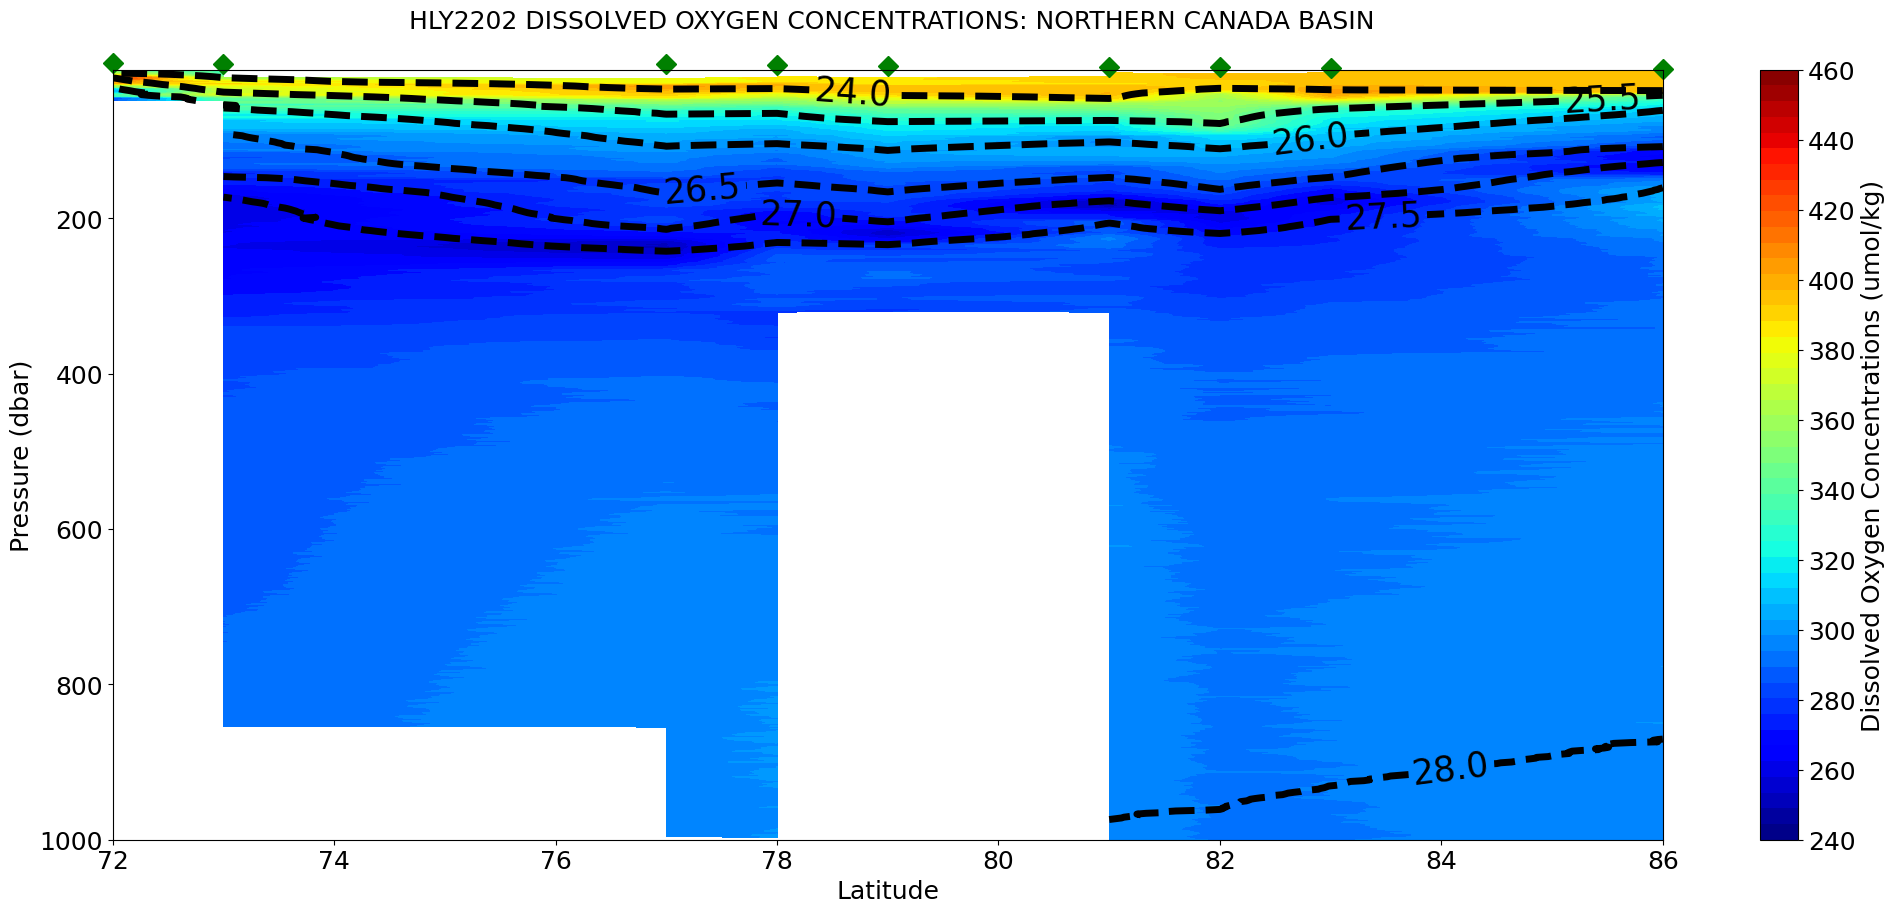

In [8]:
all_df[19] = all_df[19].round(decimals=0)
all_df = all_df.sort_index().interpolate(method='linear', limit_area='inside')
pivot_df = all_df.pivot_table(index=0, columns = 19, values='CFO2')

depth2 = pivot_df.index
lati2 = pivot_df.columns
oxygen2 = pivot_df.values.transpose()
xi, yi = np.meshgrid(lati2,depth2,indexing='ij')
#from matplotlib.colors import LogNorm
plt.figure(figsize=(25,10))
levels = np.linspace(240, 460)
plt.contourf(xi,yi,oxygen2, cmap = 'jet', levels=levels,vmin=240, vmax=460)
plt.gca().invert_yaxis()
#plt.gca().invert_xaxis()

cbar = plt.colorbar( ticks=(240,260,280,300,320, 340,360,380,400,420,440,460))

cbar.set_label('Dissolved Oxygen Concentrations (umol/kg)', fontsize=18)
cbar.ax.tick_params(labelsize=18)
plt.xlabel('Latitude',fontsize=18)
plt.ylabel('Pressure (dbar)' ,fontsize=18)
plt.ylim(bottom = 1000)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.plot(lati2,range(len(lati2)), 'gD',clip_on=False, markersize=10, zorder=1)

#plt.xlim(left = 80)
plt.title(" HLY2202 DISSOLVED OXYGEN CONCENTRATIONS: NORTHERN CANADA BASIN", pad=30, fontsize=18)


##Creating matrix for density tables
density_df = all_df.pivot_table(index=0, columns = 19, values=22)
density_df.dropna()
density_df.drop(index=density_df.index[0], axis=0, inplace=True)
depth3 = density_df.index
lati3 = density_df.columns
density = density_df.values
Xi,Yi = np.meshgrid(lati3,depth3, indexing='ij')
#levels2 = np.linspace(24,28,4)
levels2 = np.linspace(24,25.5, 2)
levels3 = (26,26.5,27.0, 27.5, 28.0) 
density1 = plt.contour(Xi, Yi, density.T , levels = levels2,vmin=24,vmax=26, linestyles = 'dashed', linewidths = 5, colors= 'black')
density2 = plt.contour(Xi, Yi, density.T ,levels=levels3, vmin=26, vmax=28, linestyles = 'dashed', linewidths = 5, colors= 'black')
plt.clabel(density1, inline=1, fontsize=25)
plt.clabel(density2, inline=1, fontsize=25)

#plt.savefig("HLY2202_O2_NORTHERNCB.png",facecolor='white',transparent = False)

In [4]:
##Importing GEOTRACES files, quality control filtered previosuly
geoeast= pd.read_csv('/Users/mariacristinaalvarez/Documents/PcalO2cal/EastGeotraces2015_QC.csv')

In [14]:
import gsw
geoeast['SA'] =gsw.SA_from_SP(geoeast['salinity'], geoeast['pressure'], geoeast['longitude'], geoeast['latitude'])

geoeast['CT'] = gsw.conversions.CT_from_t(geoeast['SA'],geoeast['temperature'], geoeast['pressure'])
#Calculate potential density
geoeast['potentialDensity'] = gsw.density.sigma0(geoeast['SA'], geoeast['CT'])

In [12]:
geoeast['salinity'].max()

34.9601

In [19]:
geoeast.columns

Index(['pressure', 'station', 'pressure_QC', 'temperature', 'temperature_QC',
       'salinity', 'salinity_QC', 'oxygen', 'oxygen_QC', 'CTDXMISS',
       'CTDXMISS_QC', 'CTDFLUOR', 'CTDFLUOR_QC', 'CTDPAR', 'CTDPAR_QC',
       'CTDNOBS', 'CTDETIME', 'woce_date', 'woce_time', 'cast', 'time',
       'latitude', 'longitude', 'temp_S', 'exp_O2umolkg', 'AOU', 'SA g/kg',
       'in-situ Density', 'sigmaD', 'SA', 'CT', 'potentialDensity'],
      dtype='object')

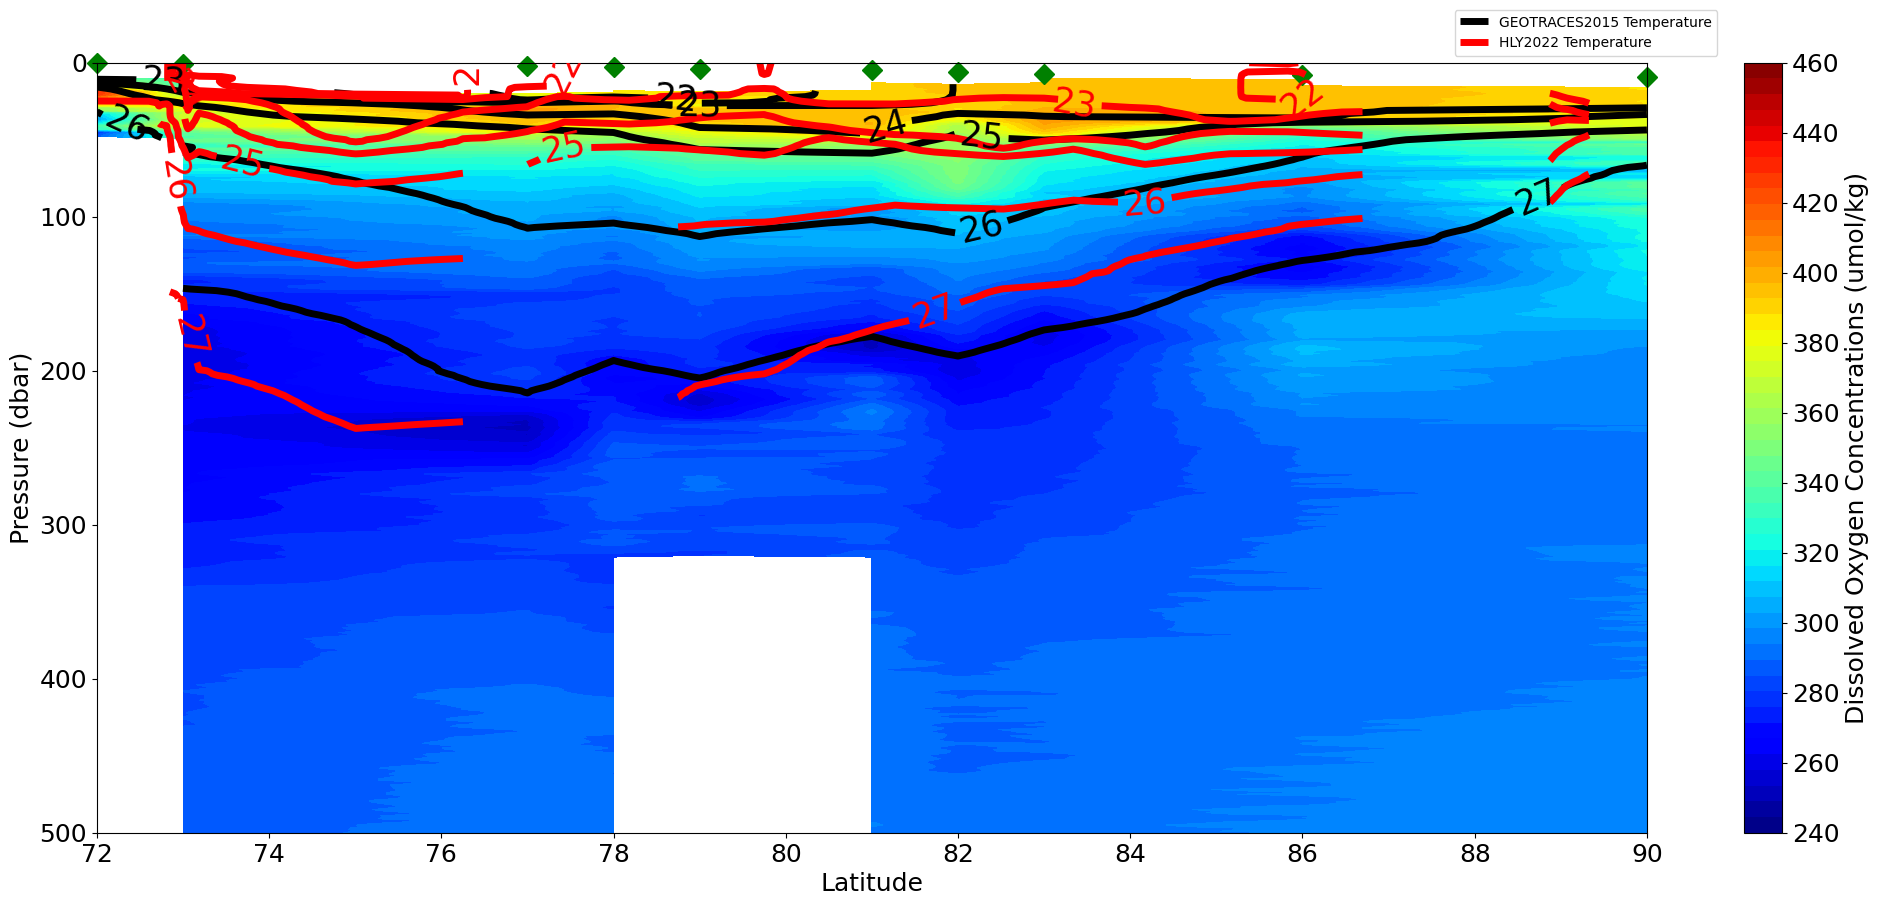

In [25]:
#DENSITY LOTS COMPARISON BOTH DATASETS
# Creating HLY2202 Grid:
density_df = all_df.pivot_table(index=0, columns = 19, values=22)
density_df.dropna()
density_df.drop(index=density_df.index[0], axis=0, inplace=True)
depth3 = density_df.index
lati3 = density_df.columns
density = density_df.values
Xi,Yi = np.meshgrid(lati3,depth3, indexing='ij')


# Creating GEOTRCES DESITY GRID: 
density_GEO = geoeast.pivot_table(index='pressure', columns = 'latitude', values='potentialDensity')
#density_df.dropna()
#density_df.drop(index=density_df.index[0], axis=0, inplace=True)
depth_GEO = density_GEO.index
lati_GEO = density_GEO.columns
density_GEO = density_GEO.values
Ai,Bi = np.meshgrid(lati_GEO,depth_GEO, indexing='ij')


#Creating contouf for oxygen
all_df[19] = all_df[19].round(decimals=0)
all_df = all_df.sort_index().interpolate(method='linear', limit_area='inside')
pivot_df = all_df.pivot_table(index=0, columns = 19, values='CFO2')
depth2 = pivot_df.index
lati2 = pivot_df.columns
oxygen2 = pivot_df.values.transpose()
zi, wi = np.meshgrid(lati2,depth2,indexing='ij')

#Creating contour plot
plt.figure(figsize=(25,10))
#plt.title(" HLY2202 DISSOLVED OXYGEN CONCENTRATIONS: NORTHERN CANADA BASIN", pad=30, fontsize=18)
plt.xlabel('Latitude',fontsize=18)
plt.ylabel('Pressure (dbar)' ,fontsize=18)
plt.gca().invert_yaxis()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim(top = 0, bottom = 500)
#plt.xlim(left=73, right=90)
levels = np.linspace(240, 460)
plt.contourf(zi,wi,oxygen2, cmap = 'jet', levels=levels,vmin=240, vmax=460)
cbar = plt.colorbar( ticks=(240,260,280,300,320, 340,360,380,400,420,440,460))
plt.plot(lati2,range(len(lati2)), 'gD',clip_on=False, markersize=10, zorder=1)
cbar.set_label('Dissolved Oxygen Concentrations (umol/kg)', fontsize=18)
cbar.ax.tick_params(labelsize=18)
densi = plt.contour(Xi, Yi, density.T , vmin=20, vmax=29, linestyles = 'solid', linewidths = 5, colors= 'black')
densi_GEO = plt.contour(Ai, Bi, density_GEO.T , vmin=20, vmax=29, linestyles = 'solid', linewidths = 5, colors= 'red')
plt.clabel(densi, inline=1, fontsize=25)
plt.clabel(densi_GEO, inline=1, fontsize=25)

h1,_ = densi.legend_elements()
h2,_ = densi_GEO.legend_elements()
plt.legend([h1[0],h2[0]], ['GEOTRACES2015 Temperature','HLY2022 Temperature'],bbox_to_anchor=(1.05, 1), loc='lower right' )

In [53]:
geoeast['salinity'].min()

25.4296

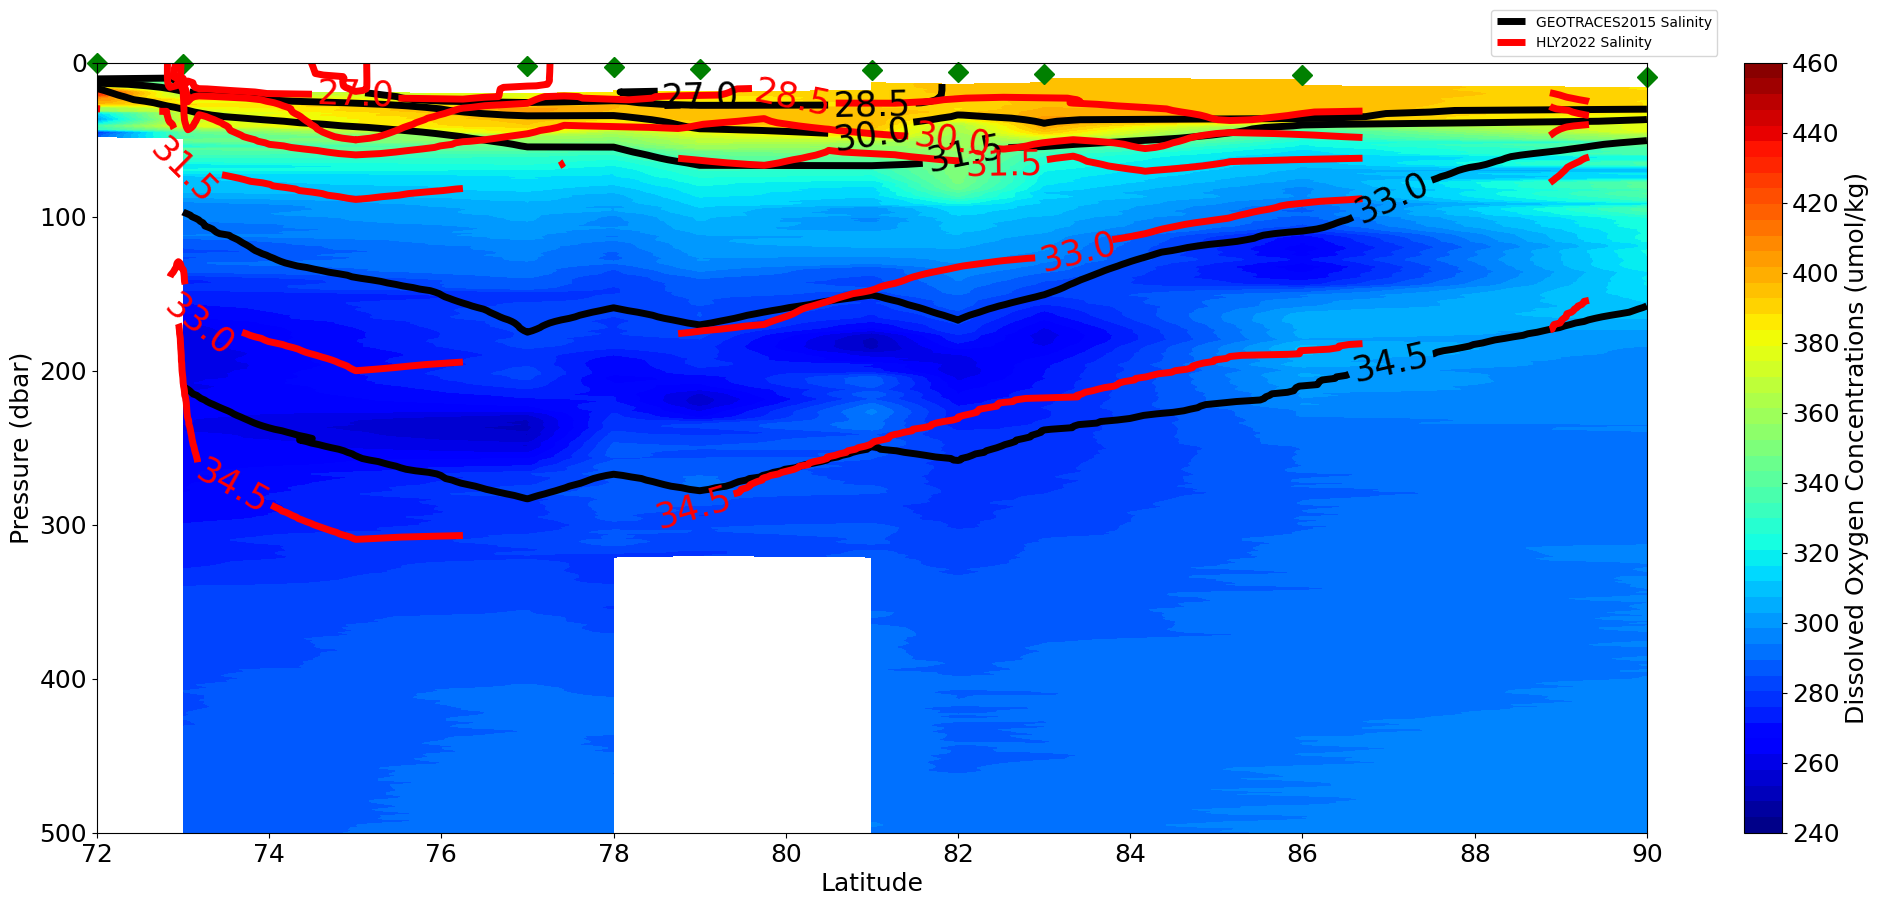

In [63]:
# Creating a pivot table for salinity:
sal_df = all_df.pivot_table(index=0, columns = 19, values=4)
sal_df.interpolate(method='linear')
salGEO_df = geoeast.pivot_table(index='pressure', columns = 'latitude', values='salinity')
salGEO_df.interpolate(method='linear')
# Creating griddata:
pressa = sal_df.index
latia = sal_df.columns
sala = sal_df.values.transpose()
ai, bi = np.meshgrid(latia,pressa,indexing='ij')

depthGEO = salGEO_df.index
latiGEO = salGEO_df.columns
salGEO = salGEO_df.values.transpose()
Ai, Bi = np.meshgrid(latiGEO,depthGEO,indexing='ij')


#Creating contouf for oxygen
all_df[19] = all_df[19].round(decimals=0)
all_df = all_df.sort_index().interpolate(method='linear', limit_area='inside')
pivot_df = all_df.pivot_table(index=0, columns = 19, values='CFO2')
depth2 = pivot_df.index
lati2 = pivot_df.columns
oxygen2 = pivot_df.values.transpose()
zi, wi = np.meshgrid(lati2,depth2,indexing='ij')

#Creating contour plot
plt.figure(figsize=(25,10))
#plt.title(" DISSOLVED OXYGEN CONCENTRATIONS: NORTHBOUND CANADA BASIN", pad=30, fontsize=18)
plt.xlabel('Latitude',fontsize=18)
plt.ylabel('Pressure (dbar)' ,fontsize=18)
plt.gca().invert_yaxis()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim(top = 0, bottom = 500)

levels = np.linspace(240, 460)
plt.contourf(zi,wi,oxygen2, cmap = 'jet', levels=levels,vmin=240, vmax=460)
cbar = plt.colorbar( ticks=(240,260,280,300,320, 340,360,380,400,420,440,460))
plt.plot(lati2,range(len(lati2)), 'gD',clip_on=False, markersize=10, zorder=1)
cbar.set_label('Dissolved Oxygen Concentrations (umol/kg)', fontsize=18)
cbar.ax.tick_params(labelsize=18)
sal = plt.contour(ai, bi, sala , vmin=-1.5, vmax=3.2, linestyles = 'solid', linewidths = 5, colors= 'black')
salGEO = plt.contour(Ai, Bi, salGEO , vmin=-1.68, vmax=4.25, linestyles = 'solid', linewidths = 5, colors= 'red')
plt.clabel(sal, inline=1, fontsize=25)
plt.clabel(salGEO, inline=1, fontsize=25)

h1,_ = sal.legend_elements()
h2,_ = salGEO.legend_elements()
plt.legend([h1[0],h2[0]], ['GEOTRACES2015 Salinity','HLY2022 Salinity'],bbox_to_anchor=(1.05, 1), loc='lower right' )

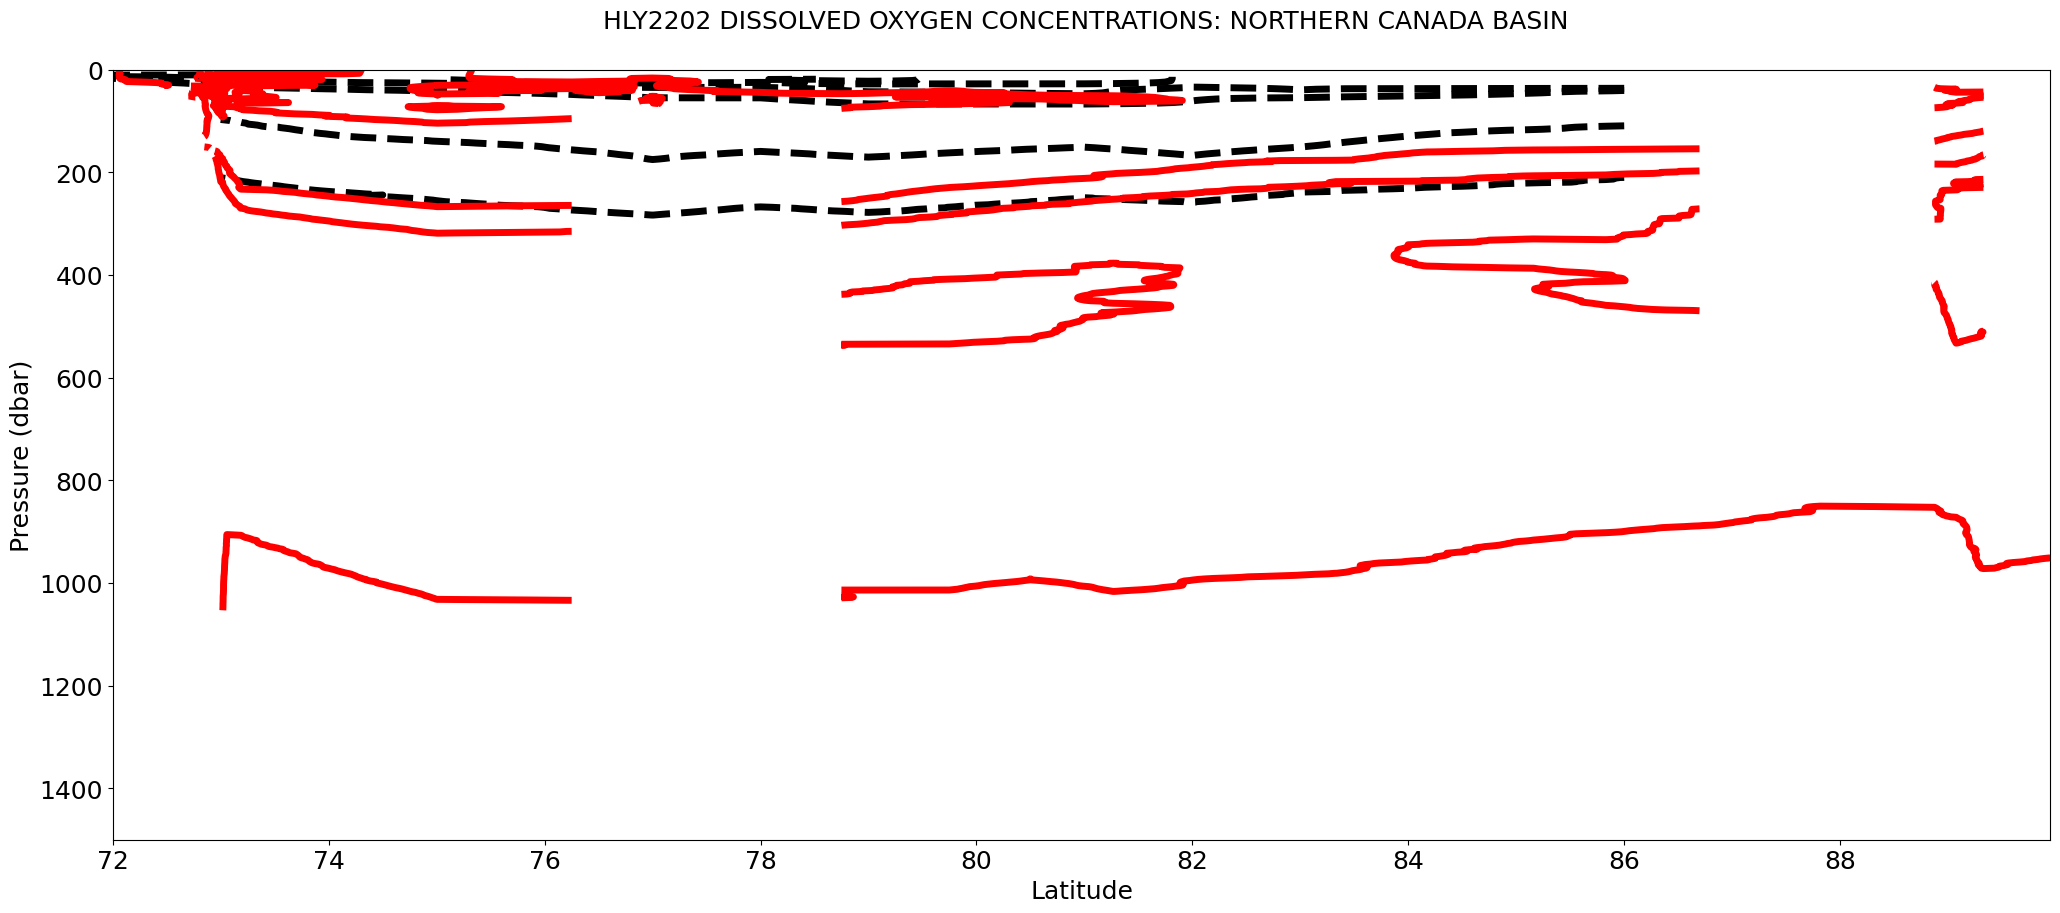

In [28]:

# Creating a pivot table for salinity:
sal_df = all_df.pivot_table(index=0, columns = 19, values=4)
salGEO_df = geoeast.pivot_table(index='pressure', columns = 'latitude', values='salinity')
# Creating griddata:
pressa = sal_df.index
latia = sal_df.columns
sala = sal_df.values.transpose()
ai, bi = np.meshgrid(latia,pressa,indexing='ij')

depthGEO = salGEO_df.index
latiGEO = tempGEO_df.columns
salGEO = tempGEO_df.values.transpose()
Ai, Bi = np.meshgrid(latiGEO,depthGEO,indexing='ij')


#Creating contour plot
plt.figure(figsize=(25,10))
plt.title(" HLY2202 DISSOLVED OXYGEN CONCENTRATIONS: NORTHERN CANADA BASIN", pad=30, fontsize=18)
plt.xlabel('Latitude',fontsize=18)
plt.ylabel('Pressure (dbar)' ,fontsize=18)
plt.gca().invert_yaxis()
plt.ylim(bottom = 1000)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim(top = 0, bottom = 1500)
temp = plt.contour(ai, bi, sala , vmin=20, vmax=34.7, linestyles = 'dashed', linewidths = 5, colors= 'black')
tempGEO = plt.contour(Ai, Bi, salGEO , vmin=20, vmax=34.7, linestyles = 'solid', linewidths = 5, colors= 'red')


In [ ]:
##Importing GEOTRACES files, quality control filtered previosuly
geoeast= pd.read_csv('/Users/mariacristinaalvarez/Documents/PcalO2cal/EastGeotraces2015_QC.csv')
# Creating a pivot table for temperature:
temp_df = all_df.pivot_table(index=0, columns = 19, values=2)

# Creating a pivot table for salinity:
sal_df = all_df.pivot_table(index=0, columns = 19, values=4)
# Creating pivot table 

TypeError: Input z must be 2D, not 0D

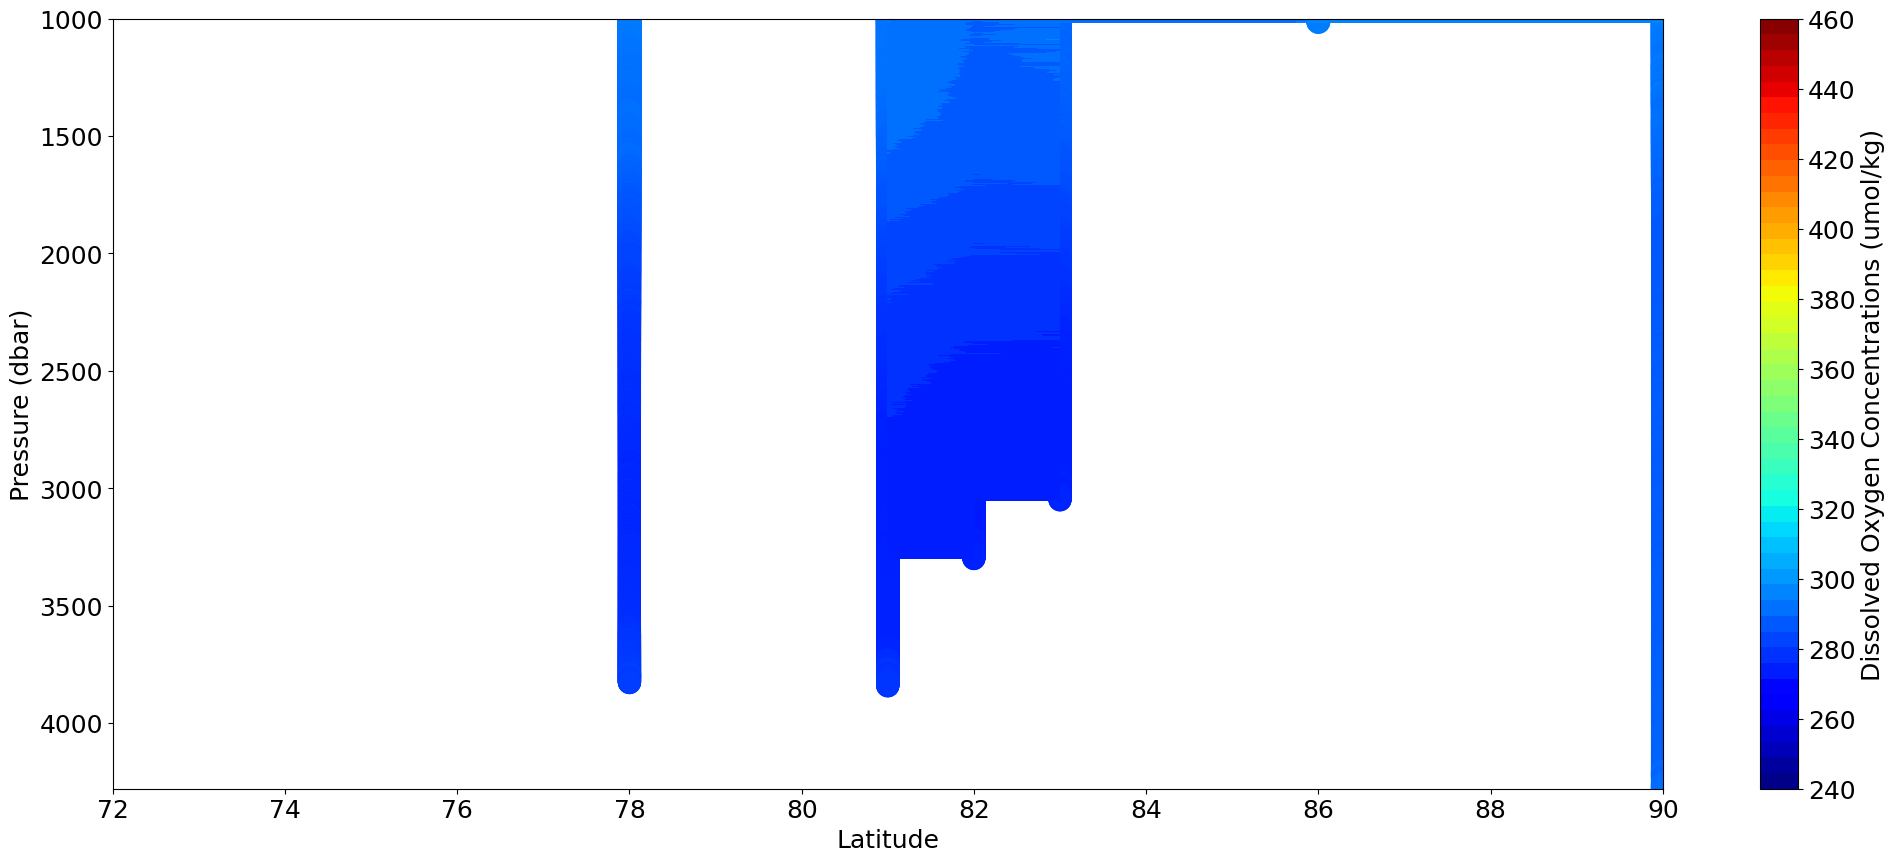

In [112]:
lower_1000 = all_df.loc[all_df[0] >= 1000]
lower1000df = lower_1000.pivot_table(index=0, columns = 18, values='CFO2')

#y = lower1000df.index
#x = lower1000df.columns
#color = lower1000df.values.transpose()
y = lower_1000[0]
x = lower_1000[18]
z = lower_1000['CFO2']
#from matplotlib.colors import LogNorm
plt.figure(figsize=(25,10))

plt.scatter(x,y,z, cmap = 'jet', c=z, linewidths=50, vmin=240,vmax=460, edgecolors='none')
levels = np.linspace(240, 460)
plt.contourf(xi,yi,oxygen2, cmap = 'jet', levels=levels,vmin=240, vmax=460)
plt.gca().invert_yaxis()
plt.xticks([72,74,76,78,80,82,84,86,88,90])
#plt.gca().invert_xaxis()
cbar = plt.colorbar( ticks=(240,260,280,300,320, 340,360,380,400,420,440,460))
cbar.set_label('Dissolved Oxygen Concentrations (umol/kg)', fontsize=18)
cbar.ax.tick_params(labelsize=18)
plt.xlabel('Latitude',fontsize=18)
plt.ylabel('Pressure (dbar)' ,fontsize=18)
plt.ylim(top= 1000)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
density = plt.contour(Xi, Yi, density , linestyles = 'dashed', linewidths = 5, cmap = 'copper_r' )
plt.clabel(density, inline=1, fontsize=25)

In [66]:
##Plotting for Temperature
pivot_T = all_df.pivot_table(index=0, columns = 18, values=2)

In [67]:
##Creating matrix for density tables
density_df = all_df.pivot_table(index=0, columns = 18, values=22)
density_df.dropna()
density_df.drop(index=density_df.index[0], axis=0, inplace=True)
depth3 = density_df.index
lati3 = density_df.columns
density = density_df.values.transpose()
Xi,Yi = np.meshgrid(lati3,depth3, indexing='ij')

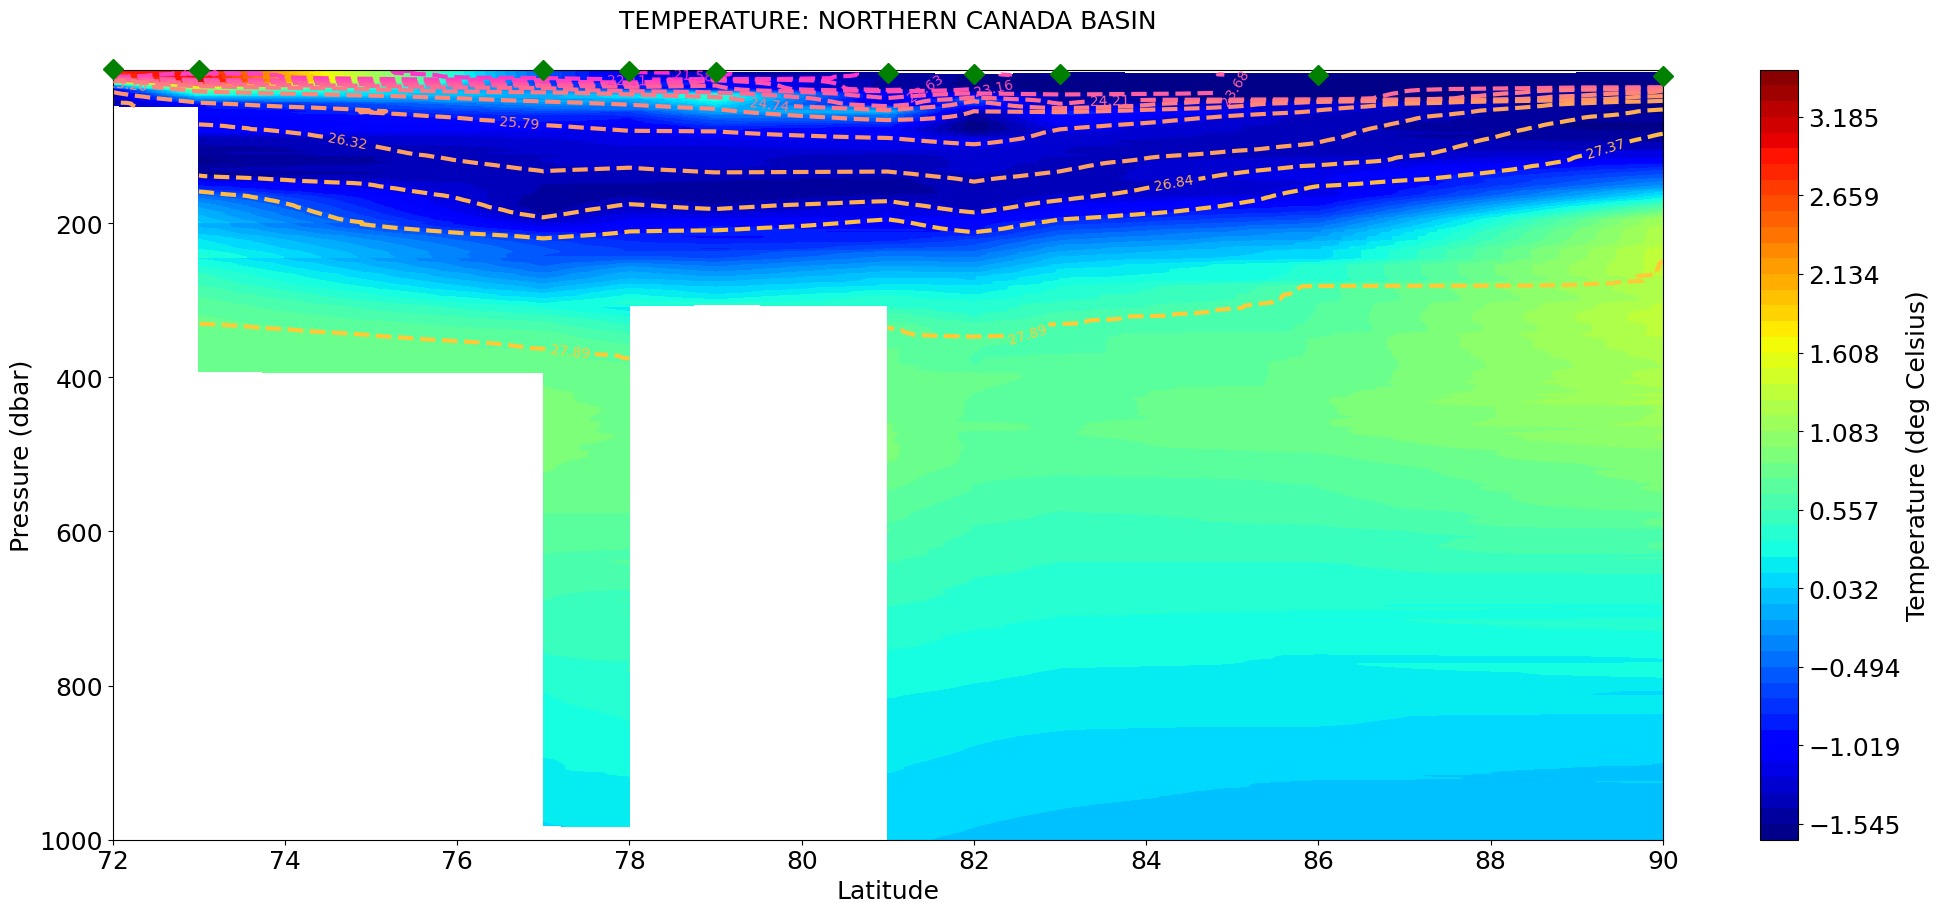

In [68]:

depth2 = pivot_T.index
lati2 = pivot_T.columns
temp2 = pivot_T.values.transpose()
xi, yi = np.meshgrid(lati2,depth2,indexing='ij')
#from matplotlib.colors import LogNorm
plt.figure(figsize=(25,10))
levels = np.linspace(-1.65, 3.5)
plt.contourf(xi,yi,temp2, cmap = 'jet', levels=levels,vmin=-1.65, vmax=3.5)
plt.gca().invert_yaxis()
#plt.gca().invert_xaxis()
cbar = plt.colorbar(extend ='both')
cbar.set_label('Temperature (deg Celsius)', fontsize=18)
cbar.ax.tick_params(labelsize=18)
plt.xlabel('Latitude',fontsize=18)
plt.ylabel('Pressure (dbar)' ,fontsize=18)
plt.ylim(bottom = 1000)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.plot(lati2,range(len(lati2)), 'gD',clip_on=False, markersize=10, zorder=20)
#plt.xlim(left = 80)
plt.title("TEMPERATURE: NORTHERN CANADA BASIN", pad=30, fontsize=18)
levels2 = np.linspace(20,30,num= 20)
density = plt.contour(Xi, Yi, density , levels = levels2, linestyles = 'dashed', linewidths = 3, cmap = 'spring' )
plt.clabel(density, inline=1, fontsize=10)

plt.savefig("HLY2202_TEMP_NORTHERNCB.png",facecolor='white',transparent = False)

In [70]:
##Plotting for Salinity
pivot_S = all_df.pivot_table(index=0, columns = 18, values=24)

In [75]:
all_df[24].min()

26.4942

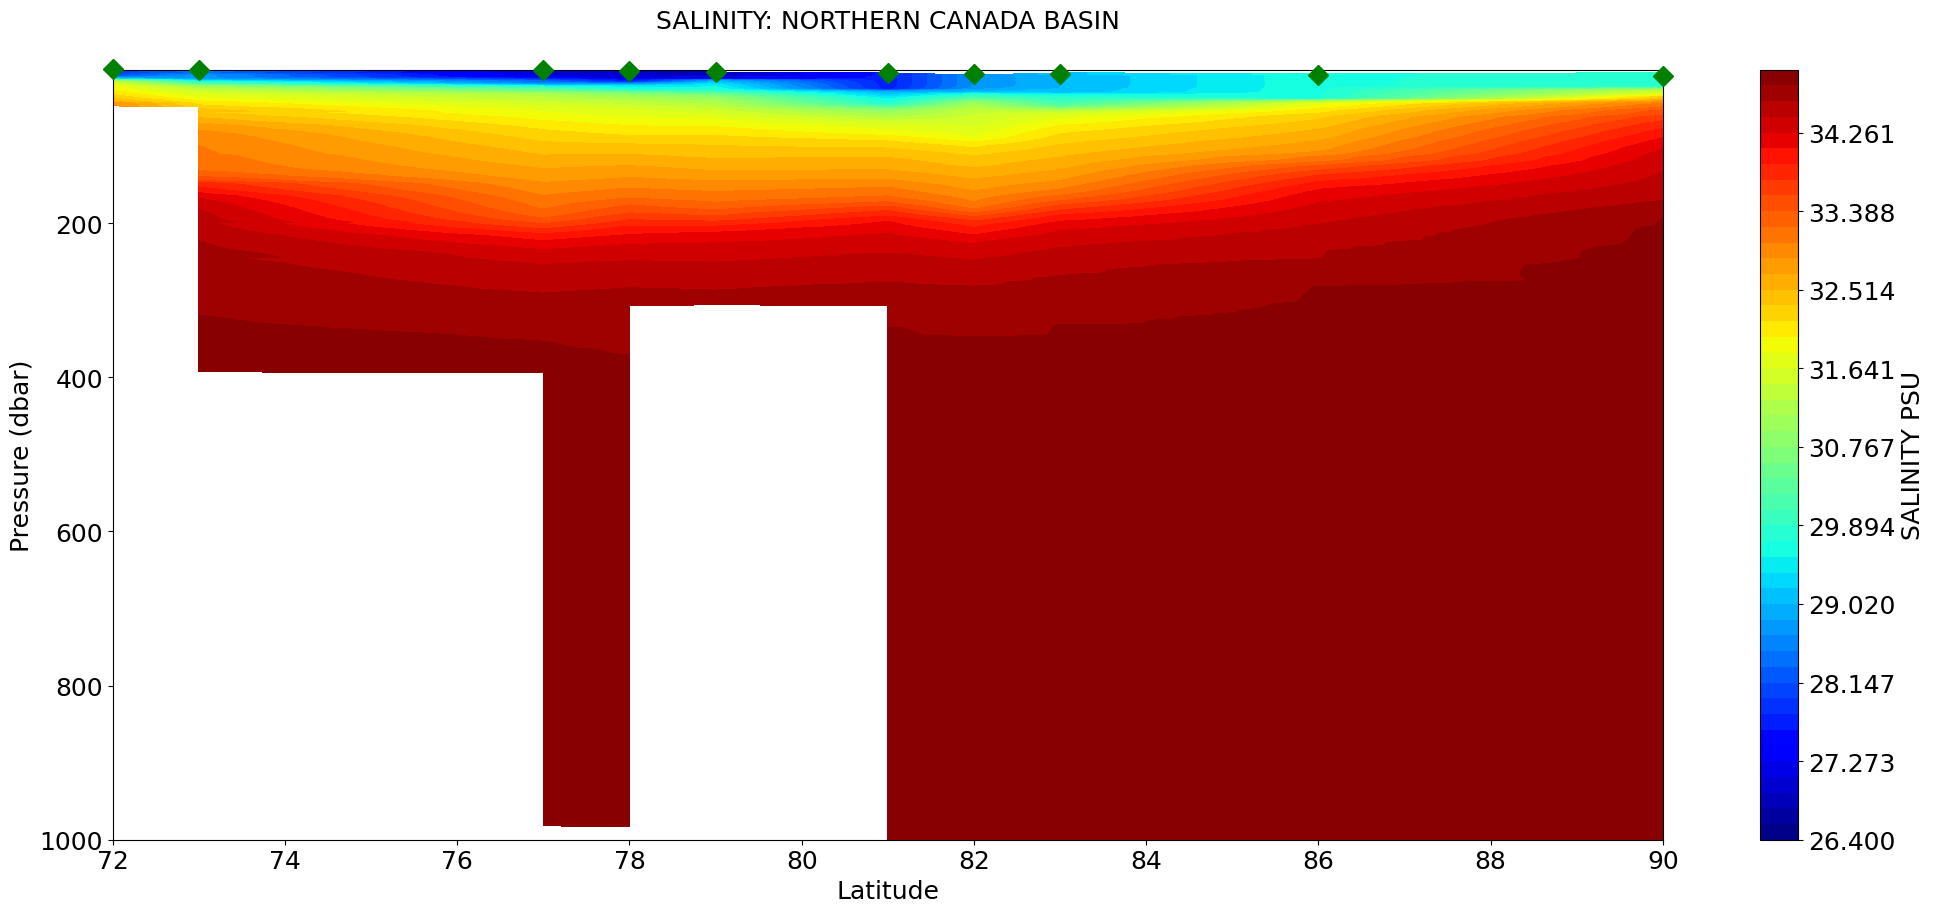

In [76]:
##Plotting for Salinity
pivot_S = all_df.pivot_table(index=0, columns = 18, values=24)

##Creating matrix for density tables
density_df = all_df.pivot_table(index=0, columns = 18, values=22)
density_df.dropna()
density_df.drop(index=density_df.index[0], axis=0, inplace=True)
depth3 = density_df.index
lati3 = density_df.columns
density = density_df.values.transpose()
Xi,Yi = np.meshgrid(lati3,depth3, indexing='ij')


depth2 = pivot_S.index
lati2 = pivot_S.columns
sal2 = pivot_S.values.transpose()
xi, yi = np.meshgrid(lati2,depth2,indexing='ij')
#from matplotlib.colors import LogNorm
plt.figure(figsize=(25,10))
levels = np.linspace(26.4, 34.96)
plt.contourf(xi,yi,sal2, cmap = 'jet', levels=levels,vmin=26.4, vmax=34.96)
plt.gca().invert_yaxis()
#plt.gca().invert_xaxis()
cbar = plt.colorbar(extend ='both')
cbar.set_label('SALINITY PSU', fontsize=18)
cbar.ax.tick_params(labelsize=18)
plt.xlabel('Latitude',fontsize=18)
plt.ylabel('Pressure (dbar)' ,fontsize=18)
plt.ylim(bottom = 1000)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.plot(lati2,range(len(lati2)), 'gD',clip_on=False, markersize=10, zorder=20)
#plt.xlim(left = 80)
plt.title("SALINITY: NORTHERN CANADA BASIN", pad=30, fontsize=18)
#levels2 = np.linspace(20,30,num= 20)
#density = plt.contour(Xi, Yi, density , levels = levels2, linestyles = 'dashed', linewidths = 3, cmap = 'spring' )
#plt.clabel(density, inline=1, fontsize=10)

plt.savefig("HLY2202_SAL_NORTHERNCB.png",facecolor='white',transparent = False)